In [1]:
import pandas as pd
import numpy as np
import calendar

In [2]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [4]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Formatting the columns and their datatypes

In [5]:
import datetime as dt
# Renaming columns for better clarity
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

In [6]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


Exploratory data analysis

In [7]:
df_stat = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
print(round(df_stat.describe().T, 2))

                                     count         mean          std  \
Estimated Unemployment Rate          267.0        12.24        10.80   
Estimated Employed                   267.0  13962105.72  13366318.36   
Estimated Labour Participation Rate  267.0        41.68         7.85   

                                           min         25%         50%  \
Estimated Unemployment Rate               0.50        4.84        9.65   
Estimated Employed                   117542.00  2838930.50  9732417.00   
Estimated Labour Participation Rate      16.77       37.26       40.39   

                                             75%          max  
Estimated Unemployment Rate                16.76        75.85  
Estimated Employed                   21878686.00  59433759.00  
Estimated Labour Participation Rate        44.06        69.69  


In [8]:
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed', 
                                       'Estimated Labour Participation Rate']].mean().reset_index()
print(round(region_stats, 2))

      Region  Estimated Unemployment Rate  Estimated Employed  \
0       East                        13.92         19602366.90   
1      North                        15.89         13072487.92   
2  Northeast                        10.95          3617105.53   
3      South                        10.45         14040589.33   
4       West                         8.24         18623512.72   

   Estimated Labour Participation Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

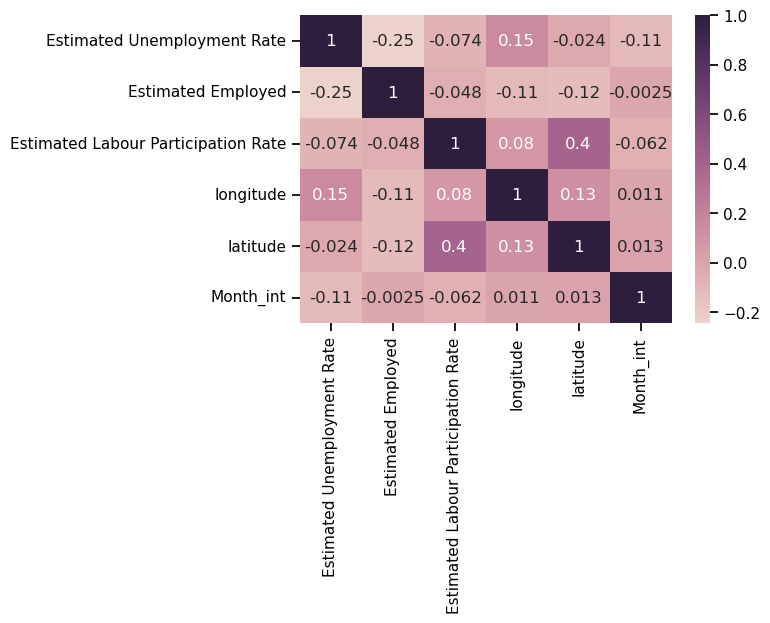

In [10]:
hm = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month_int']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))


In [11]:
import plotly.express as px
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

scatter matrix

In [12]:
fig = px.scatter_matrix(df,template='seaborn',dimensions=['Estimated Unemployment Rate', 'Estimated Employed',
                                                          'Estimated Labour Participation Rate'],color='Region')
fig.show()

In [13]:
plot_unemp = df[['Estimated Unemployment Rate','States']]
df_unemployed = plot_unemp.groupby('States').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate')

fig = px.bar(df_unemployed, x='States',y='Estimated Unemployment Rate',color = 'States',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

In [14]:
# Creating a DataFrame with relevant columns
unemployed_df = df[['States', 'Region', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]

unemployed = unemployed_df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

# Creating a Sunburst chart 
fig = px.sunburst(unemployed, path=['Region', 'States'], values='Estimated Unemployment Rate', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=550, template='presentation')

fig.show()